In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

# Notation

A single training example is denoted by -

$$ ( x , y ) \,\,\,,\, y \in \{0,1\} $$

And for m training examples - 

$$ TrainingSet = \{(x^{(1)},y^{(1)}), (x^{(2)},y^{(2)}), .... , (x^{(m)},y^{(m)})\}$$

The feature vectors for training samples -

$$X = \begin{pmatrix} x^{(1)}_1 & x^{(2)}_1 & ... & x^{(m)}_1 \\ x^{(1)}_2 & x^{(2)}_2 & ... & x^{(m)}_2 \\ . & . & ... & .  \\ x^{(1)}_n & x^{(2)}_n & ... & x^{(m)}_n  \end{pmatrix} \,\,\,,\, X \in R^{n_x \times m}$$

and X.shape = (n x m) where m is number of samples, n is the dimensionality of the feature vector (usually the # of features). *This is different in than other ML algos where the shape is (m x n) as its easier to implement neural networks in this way.*

Similarly,

$$Y = \begin{pmatrix} y^{(1)} & y^{(2)} & .... & y^{(m)} \end{pmatrix} \,\,,\, Y \in R^{1 \times m}$$

```python
X.shape = (n,m)
Y.shape = (1,m)
```

# Logistic Regression

Given $x$, want $\hat y = P(y=1 \mid x)$ where $x \in R^{n_x}$

Parameters: $w \in R^{n_x}$ , $b \in R$

*If you were using linear regression then you would make a linear equation as $ \hat y = w^Tx + b$ but this isnt a good algo for binary classification since you want $0 \leq \hat y \leq 1$ since R.H.S can be any positive or negative quantity.*

Thus, we use the sigmoid function for this - 

$$ \hat y = \sigma(w^Tx + b)$$

The formula for sigmoid function - 

$$ \sigma(Z) = {1 \over 1+e^{-Z}} $$

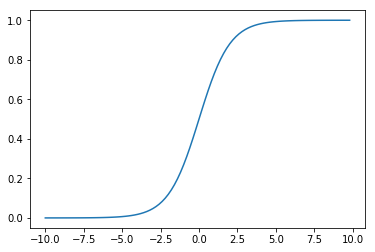

In [16]:
# What does the sigmoid function look like?
def sigmoid(x):
    return [1/(1+math.exp(-i)) for i in x]

x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)
plt.plot(x,sig)
plt.show()

If Z is very large positive then $\sigma(Z) \approx 1$, and if Z is very large negative then $\sigma(Z) \approx 0$

**Objective - When you implement logistic regression, your job is to implement parameters $w$ and $b$ so that $\hat y$ becomes a good estimate of the chance of $y$ being equal to one.**

In some conventions, you make $x_0 = 1, x \in R^{n_x+1}$ and this allows you to handle $b$ with $\hat y = \sigma(\theta^Tx)$ where $\theta_0$ represents $b$ and all other values represent $w$

$$ \theta = \begin{pmatrix} \theta_0 \\ \theta_1 \\ \theta_2 \\ . \\ . \\ \theta_n \end{pmatrix}$$

<u>*Turns out that in neural networks, its easier to keep $b$ and $w$ separately.*</u>

# Logistic Regression Cost function

Given, $\{(x^{(1)},y^{(1)}), (x^{(2)},y^{(2)}), .... , (x^{(m)},y^{(m)})\}$ , want $\hat y^{(i)} \approx y^{(i)}$

$\hat y^{(i)} = \sigma(w^Tx^{(i)} + b)$ , where $\sigma(Z^{(i)}) = {1 \over 1+e^{-Z^{(i)}}}$

$(i)$ means $i^{th}$ sample.

**Objective - We need to define a function to measure how good is our output $\hat y$ is when the true label is $y$.**

One thing that could be done is create a loss (error) function, $L(\hat y, y) = {1 \over 2}(\hat y - y)^2$

This is called squared error, *but in logistic regression we don't do this since the optimization problem for logistic regression becomes non-convex with multiple local minimas causing gradient descent to not work properly.*

Therefore, we define a different loss function which works similar to squared error but gives a convex function so that an optimizer can run properly.

$$ L(\hat y, y) = -(y \log(\hat y) + (1-y) \log(1-\hat y)) $$

If $y=1$ : $L(\hat y, y) = -\log \hat y $ which means you want $\log \hat y$ to be large, or $\hat y$ to be large.

If $y=0$ : $L(\hat y, y) = -\log(1- \hat y) $ which means you want $\log (1-\hat y)$ to be small, or $\hat y$ to be small.


In [87]:
def squarederror(x,y):
    return (0.5*((x-y)**2))

def logloss1(x,y):
     return (-1*((x*np.log(y))+((1-x)*(np.log(1-y)))))

<IPython.core.display.Javascript object>


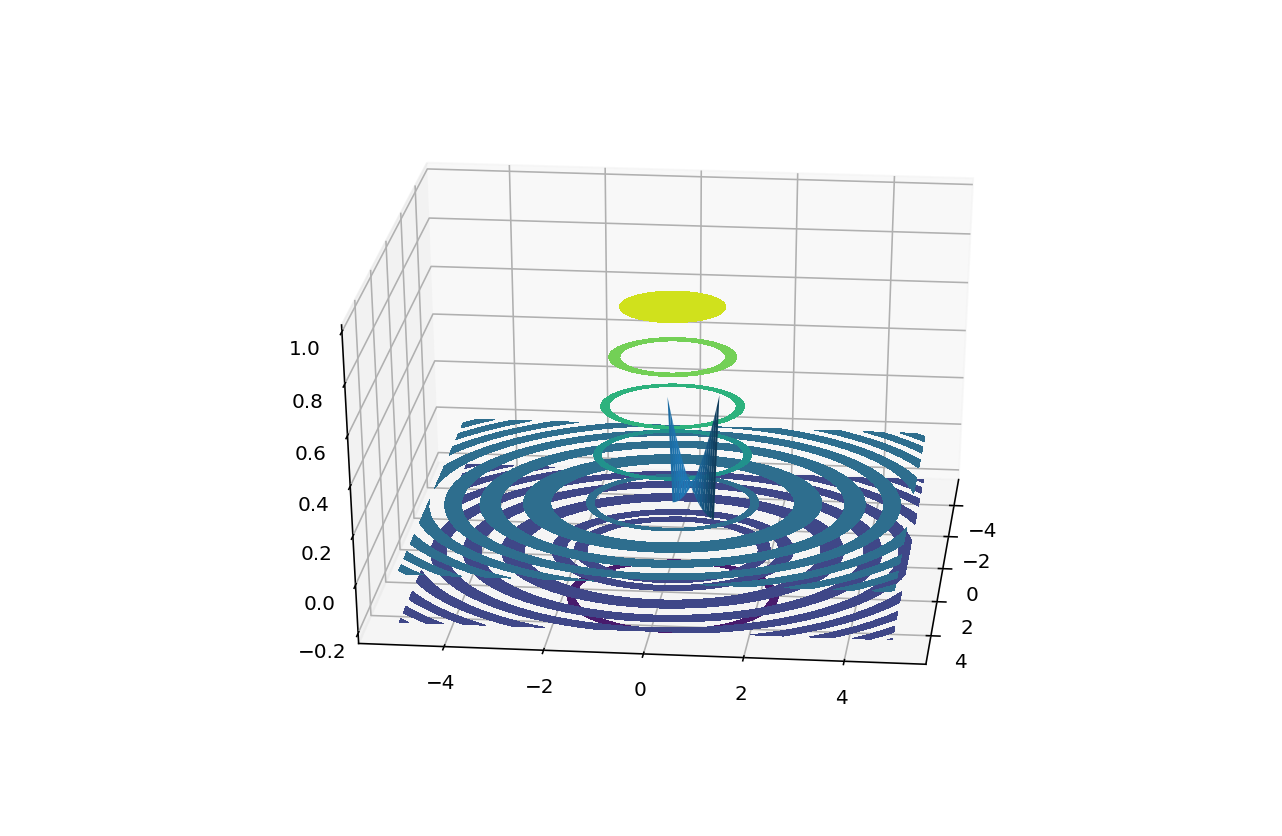

In [92]:
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
%matplotlib notebook

true_label = np.array([0,1])
predicted = np.arange(0., 1., 0.05)
X,Y = meshgrid(true_label, predicted) # grid of point
Z = squarederror(X, Y) # evaluation of the function on the grid

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z)#, rstride=1, cstride=1, cmap=cm.RdBu,linewidth=0)#, antialiased=False)

#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
#fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

<IPython.core.display.Javascript object>


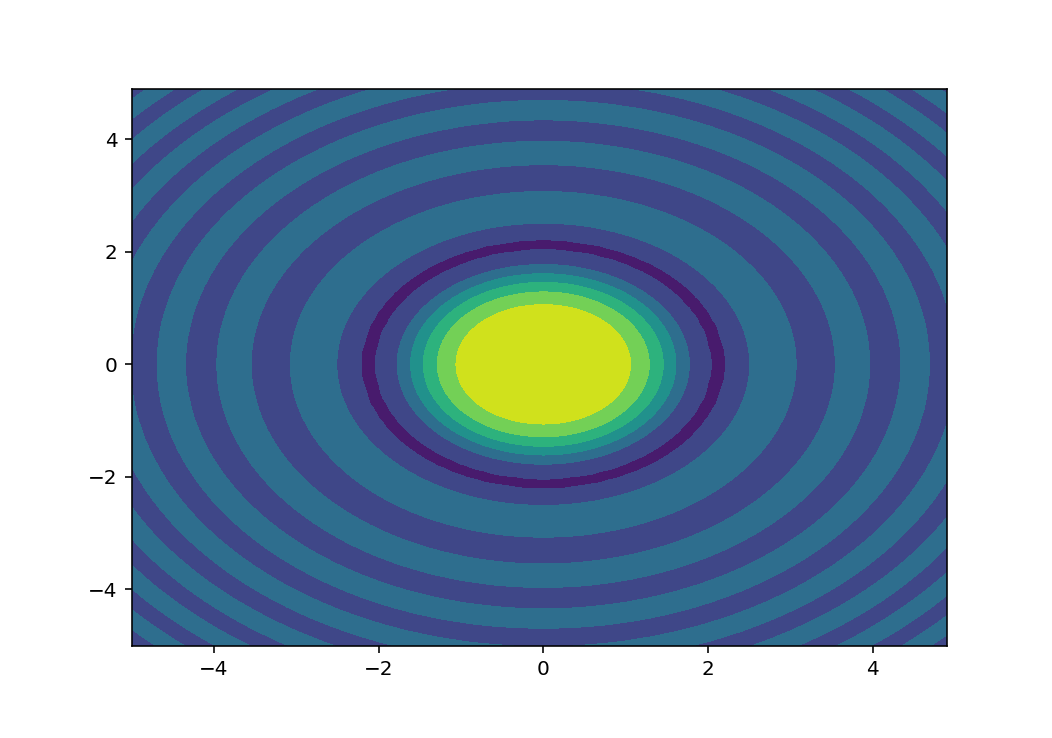

In [95]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
h = plt.contourf(x,y,z)